<a href="https://colab.research.google.com/github/tomonari-masada/course2021-sml/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分析例
* 参考文献
 * https://otexts.com/fpp2/seasonal-arima.html
* 実装を参考にした記事
 * https://ai-trend.jp/basic-study/time-series-analysis/sarima_model/

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* データの読み込み

In [ ]:
s_ice = pd.read_csv('/content/drive/MyDrive/2021Courses/SML/S_seaice_extent_daily_v3.0.csv')
s_ice.shape

(13896, 6)

* 前処理

In [ ]:
s_ice = s_ice.drop(0, axis=0)
s_ice = s_ice[(s_ice.Year != '1978') & (s_ice.Year != '2021')]
s_ice.reset_index(drop=True, inplace=True)
s_ice.columns = s_ice.columns.str.strip()
s_ice = s_ice.drop(['Missing', 'Source Data'], axis=1)
s_ice['Extent'] = s_ice['Extent'].astype(float)

* 月毎の平均値を使う。

In [ ]:
s_ice_grouped = s_ice.groupby(['Year', 'Month'], as_index=False)
s_ice_monthly = s_ice_grouped.mean()[['Year', 'Month', 'Extent']]
s_ice = s_ice_monthly

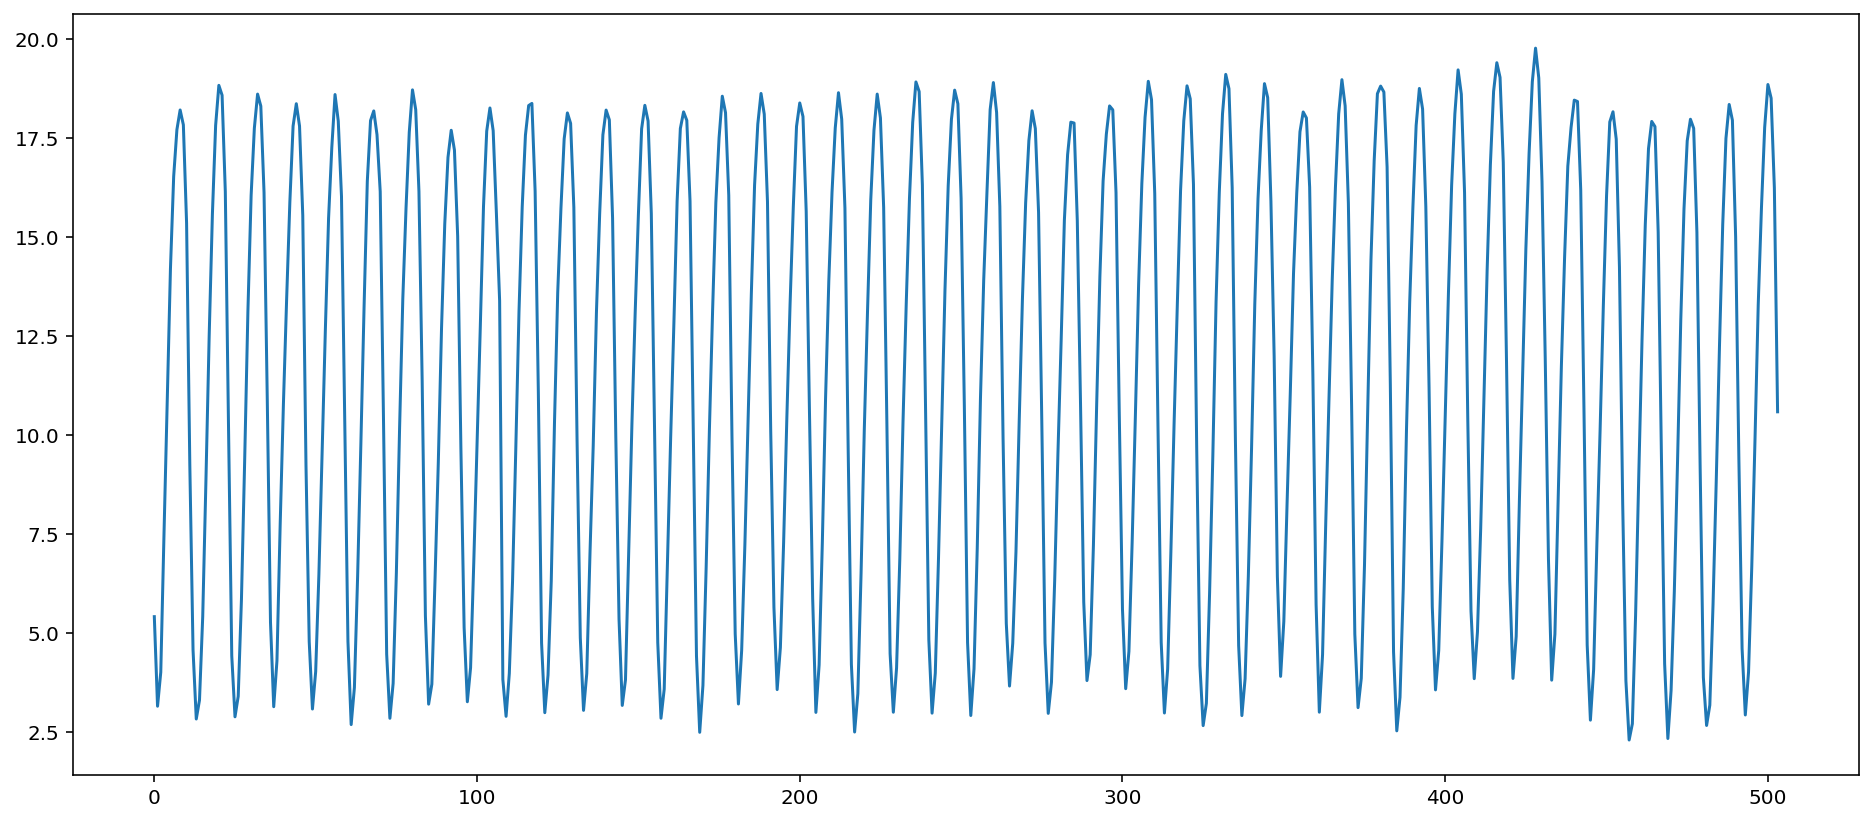

In [ ]:
plt.rcParams["figure.figsize"] = (16, 7)
s_ice['Extent'].plot(label='observed')

* 最後の1/8をテストデータとして使う。

In [ ]:
test_len = len(s_ice.index) // 8
train_len = len(s_ice.index) - test_len
train_index, test_index = s_ice.index[:train_len], s_ice.index[train_len:]
print(train_index.shape, test_index.shape)

(441,) (63,)


In [ ]:
train_data = s_ice.loc[train_index,'Extent']

* SARIMAモデルによる分析

In [ ]:
p = [1, 2, 3]
d = [0, 1]
q = [1, 2, 3]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 1, 1, 12), (1, 1, 1, 12)]

* SARIMAモデルのパラメータ探索
 * グリッドサーチによる。

In [ ]:
best_aic = 1000000.0
for order in pdq:
  for seasonal_order in seasonal_pdq:
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    try:
      results = model.fit()
    except:
      continue
    if results.aic < best_aic:
      best_aic = results.aic
      best_order = order
      best_seasonal_order = seasonal_order
    print(f'### order: {order}, s_order: {seasonal_order} - AIC: {results.aic}')
print(f'best: order: {best_order}, s_order: {best_seasonal_order} - AIC: {best_aic}')

### order: (1, 0, 1), s_order: (0, 1, 1, 12) - AIC: 465.4041988035933
### order: (1, 0, 1), s_order: (1, 1, 1, 12) - AIC: 463.6236758666014
### order: (1, 0, 2), s_order: (0, 1, 1, 12) - AIC: 464.3696048938685
### order: (1, 0, 2), s_order: (1, 1, 1, 12) - AIC: 462.0785165899782
### order: (1, 0, 3), s_order: (0, 1, 1, 12) - AIC: 465.69024318635513
### order: (1, 0, 3), s_order: (1, 1, 1, 12) - AIC: 463.4745270629403
### order: (1, 1, 1), s_order: (0, 1, 1, 12) - AIC: 460.2364913281164
### order: (1, 1, 1), s_order: (1, 1, 1, 12) - AIC: 459.05568273321245
### order: (1, 1, 2), s_order: (0, 1, 1, 12) - AIC: 461.11202969279714
### order: (1, 1, 2), s_order: (1, 1, 1, 12) - AIC: 459.97564580582787
### order: (1, 1, 3), s_order: (0, 1, 1, 12) - AIC: 461.70043886953715
### order: (1, 1, 3), s_order: (1, 1, 1, 12) - AIC: 460.3517630496468


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (2, 0, 1), s_order: (0, 1, 1, 12) - AIC: 458.39211722866276


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (2, 0, 1), s_order: (1, 1, 1, 12) - AIC: 457.1865543409737
### order: (2, 0, 2), s_order: (0, 1, 1, 12) - AIC: 466.0380498578246
### order: (2, 0, 2), s_order: (1, 1, 1, 12) - AIC: 463.77562748889204
### order: (2, 0, 3), s_order: (0, 1, 1, 12) - AIC: 467.23590995749635
### order: (2, 0, 3), s_order: (1, 1, 1, 12) - AIC: 465.0820436217199
### order: (2, 1, 1), s_order: (0, 1, 1, 12) - AIC: 461.42147514655625
### order: (2, 1, 1), s_order: (1, 1, 1, 12) - AIC: 460.2751859150989
### order: (2, 1, 2), s_order: (0, 1, 1, 12) - AIC: 463.71079886106253
### order: (2, 1, 2), s_order: (1, 1, 1, 12) - AIC: 462.9244575788321
### order: (2, 1, 3), s_order: (0, 1, 1, 12) - AIC: 464.95826450691993


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (2, 1, 3), s_order: (1, 1, 1, 12) - AIC: 461.8356031918948
### order: (3, 0, 1), s_order: (0, 1, 1, 12) - AIC: 465.5271420949118


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (3, 0, 1), s_order: (1, 1, 1, 12) - AIC: 463.2236973476827


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (3, 0, 2), s_order: (0, 1, 1, 12) - AIC: 464.7142678890808


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (3, 0, 2), s_order: (1, 1, 1, 12) - AIC: 462.32415835134753


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (3, 0, 3), s_order: (0, 1, 1, 12) - AIC: 466.64912324212037


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (3, 0, 3), s_order: (1, 1, 1, 12) - AIC: 464.80319267619853
### order: (3, 1, 1), s_order: (0, 1, 1, 12) - AIC: 460.64660245338223
### order: (3, 1, 1), s_order: (1, 1, 1, 12) - AIC: 459.2670857791128
### order: (3, 1, 2), s_order: (0, 1, 1, 12) - AIC: 462.5812173550919
### order: (3, 1, 2), s_order: (1, 1, 1, 12) - AIC: 461.2311979458805


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (3, 1, 3), s_order: (0, 1, 1, 12) - AIC: 466.01262035883616


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### order: (3, 1, 3), s_order: (1, 1, 1, 12) - AIC: 465.5513292405524
best: order: (2, 0, 1), s_order: (1, 1, 1, 12) - AIC: 457.1865543409737


* ベストな設定でフィッティングをやり直し。

In [ ]:
model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


* テストデータの部分を予測させてみる。

In [ ]:
pred = results.get_prediction(start=train_len, end=train_len+test_len, dynamic=False)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha = .05)

* 予測値と実測値をプロット。

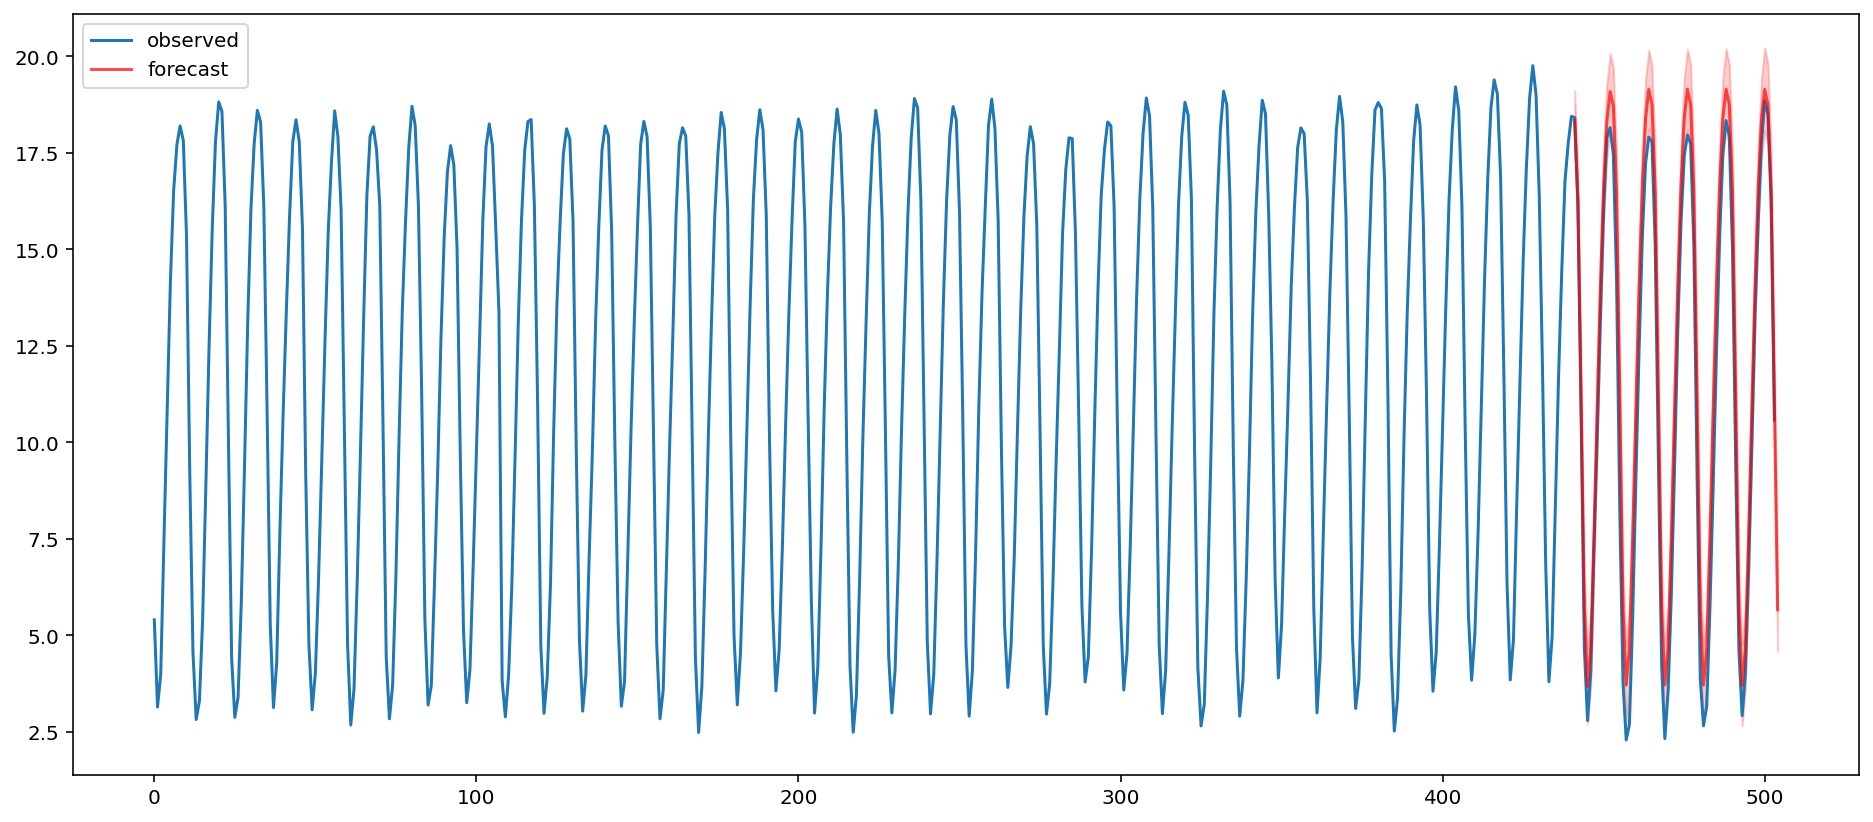

In [ ]:
plt.rcParams["figure.figsize"] = (16, 7)
s_ice.Extent.plot(label='observed')
pred_mean.plot(label='forecast', alpha=.7, color = "r")
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.2)
plt.legend(loc='upper left')

* 予測をおこなった区間を拡大。

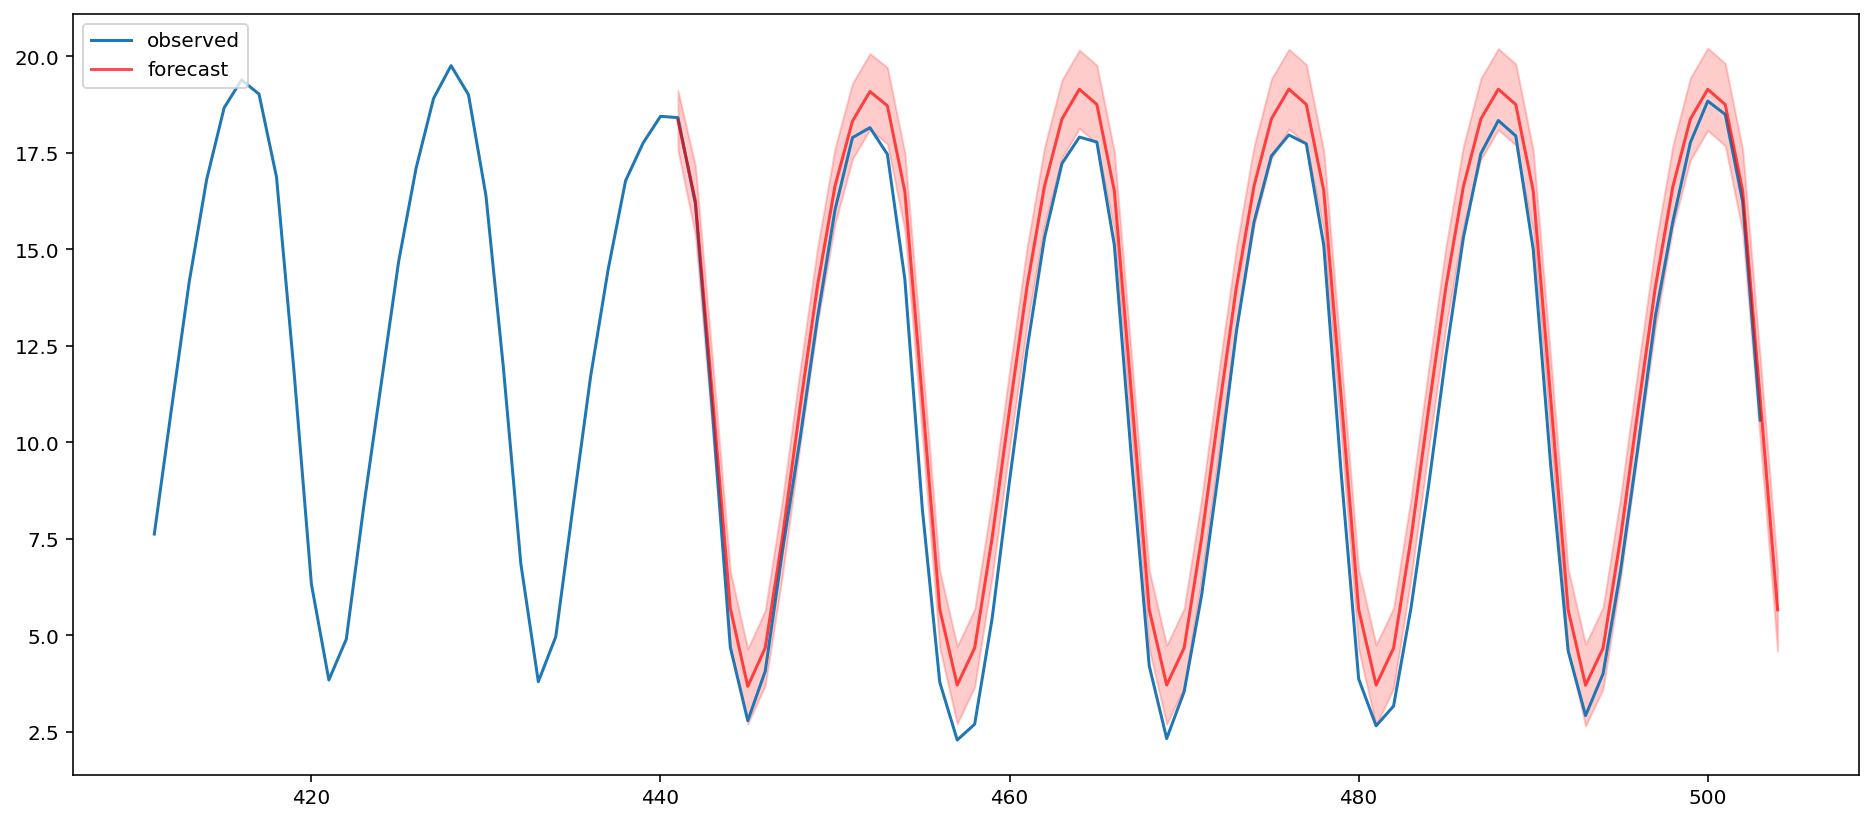

In [ ]:
plt.rcParams["figure.figsize"] = (16, 7)
s_ice.loc[s_ice.index[train_len-30:],'Extent'].plot(label='observed')
pred_mean.plot(label='forecast', alpha=.7, color = "r")
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.2)
plt.legend(loc='upper left')